# Description

This gallery notebook is used to verify that `amp/core/plotting` functions display plots correctly.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Imports

In [2]:
import logging

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import core.plotting.misc_plotting as cplmiplo
import core.plotting.visual_stationarity_test as cpvistte
import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hprint as hprint

/app/core/explore.py:39: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tauton
One and only one set-up config should be true:
is_cmamp_prod=False
is_dev4=False
is_dev_ck=False
is_ig_prod=False
is_inside_ci=False
is_mac=False


# Configure Logger

In [3]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-f756a365-0ead-4b8c-8d0a-47f016c4e10f.json'
-----------------------------------------------------------------------------
This code is not in sync with the container:
code_version='1.4.3' != container_version='1.4.0'
-----------------------------------------------------------------------------
You need to:
- merge origin/master into your branch with `invoke git_merge_master`
- pull the latest container with `invoke docker_pull`
INFO  # Git
  branch_name='SorrTask_413_unit_test_plot_projection_from_coreplottingmisc_plottingpy'
  hash='c107cb71e'
  # Last commits:
    * c107cb71e Dylan-Celli Adding basic smoke tests for plot_projection()                    (  22 hours ago) Wed Aug 2 13:27:17 2023  (HEAD -> SorrTask_413_unit_test_plot_projection_from_coreplottingmisc_plottingpy, origin/SorrTask_413_unit_test_plot_projection_from_coreplottingmisc_plottingpy)
    * 79658d8ea Dyla

# Plots

## `plot_histograms_and_lagged_scatterplot()`

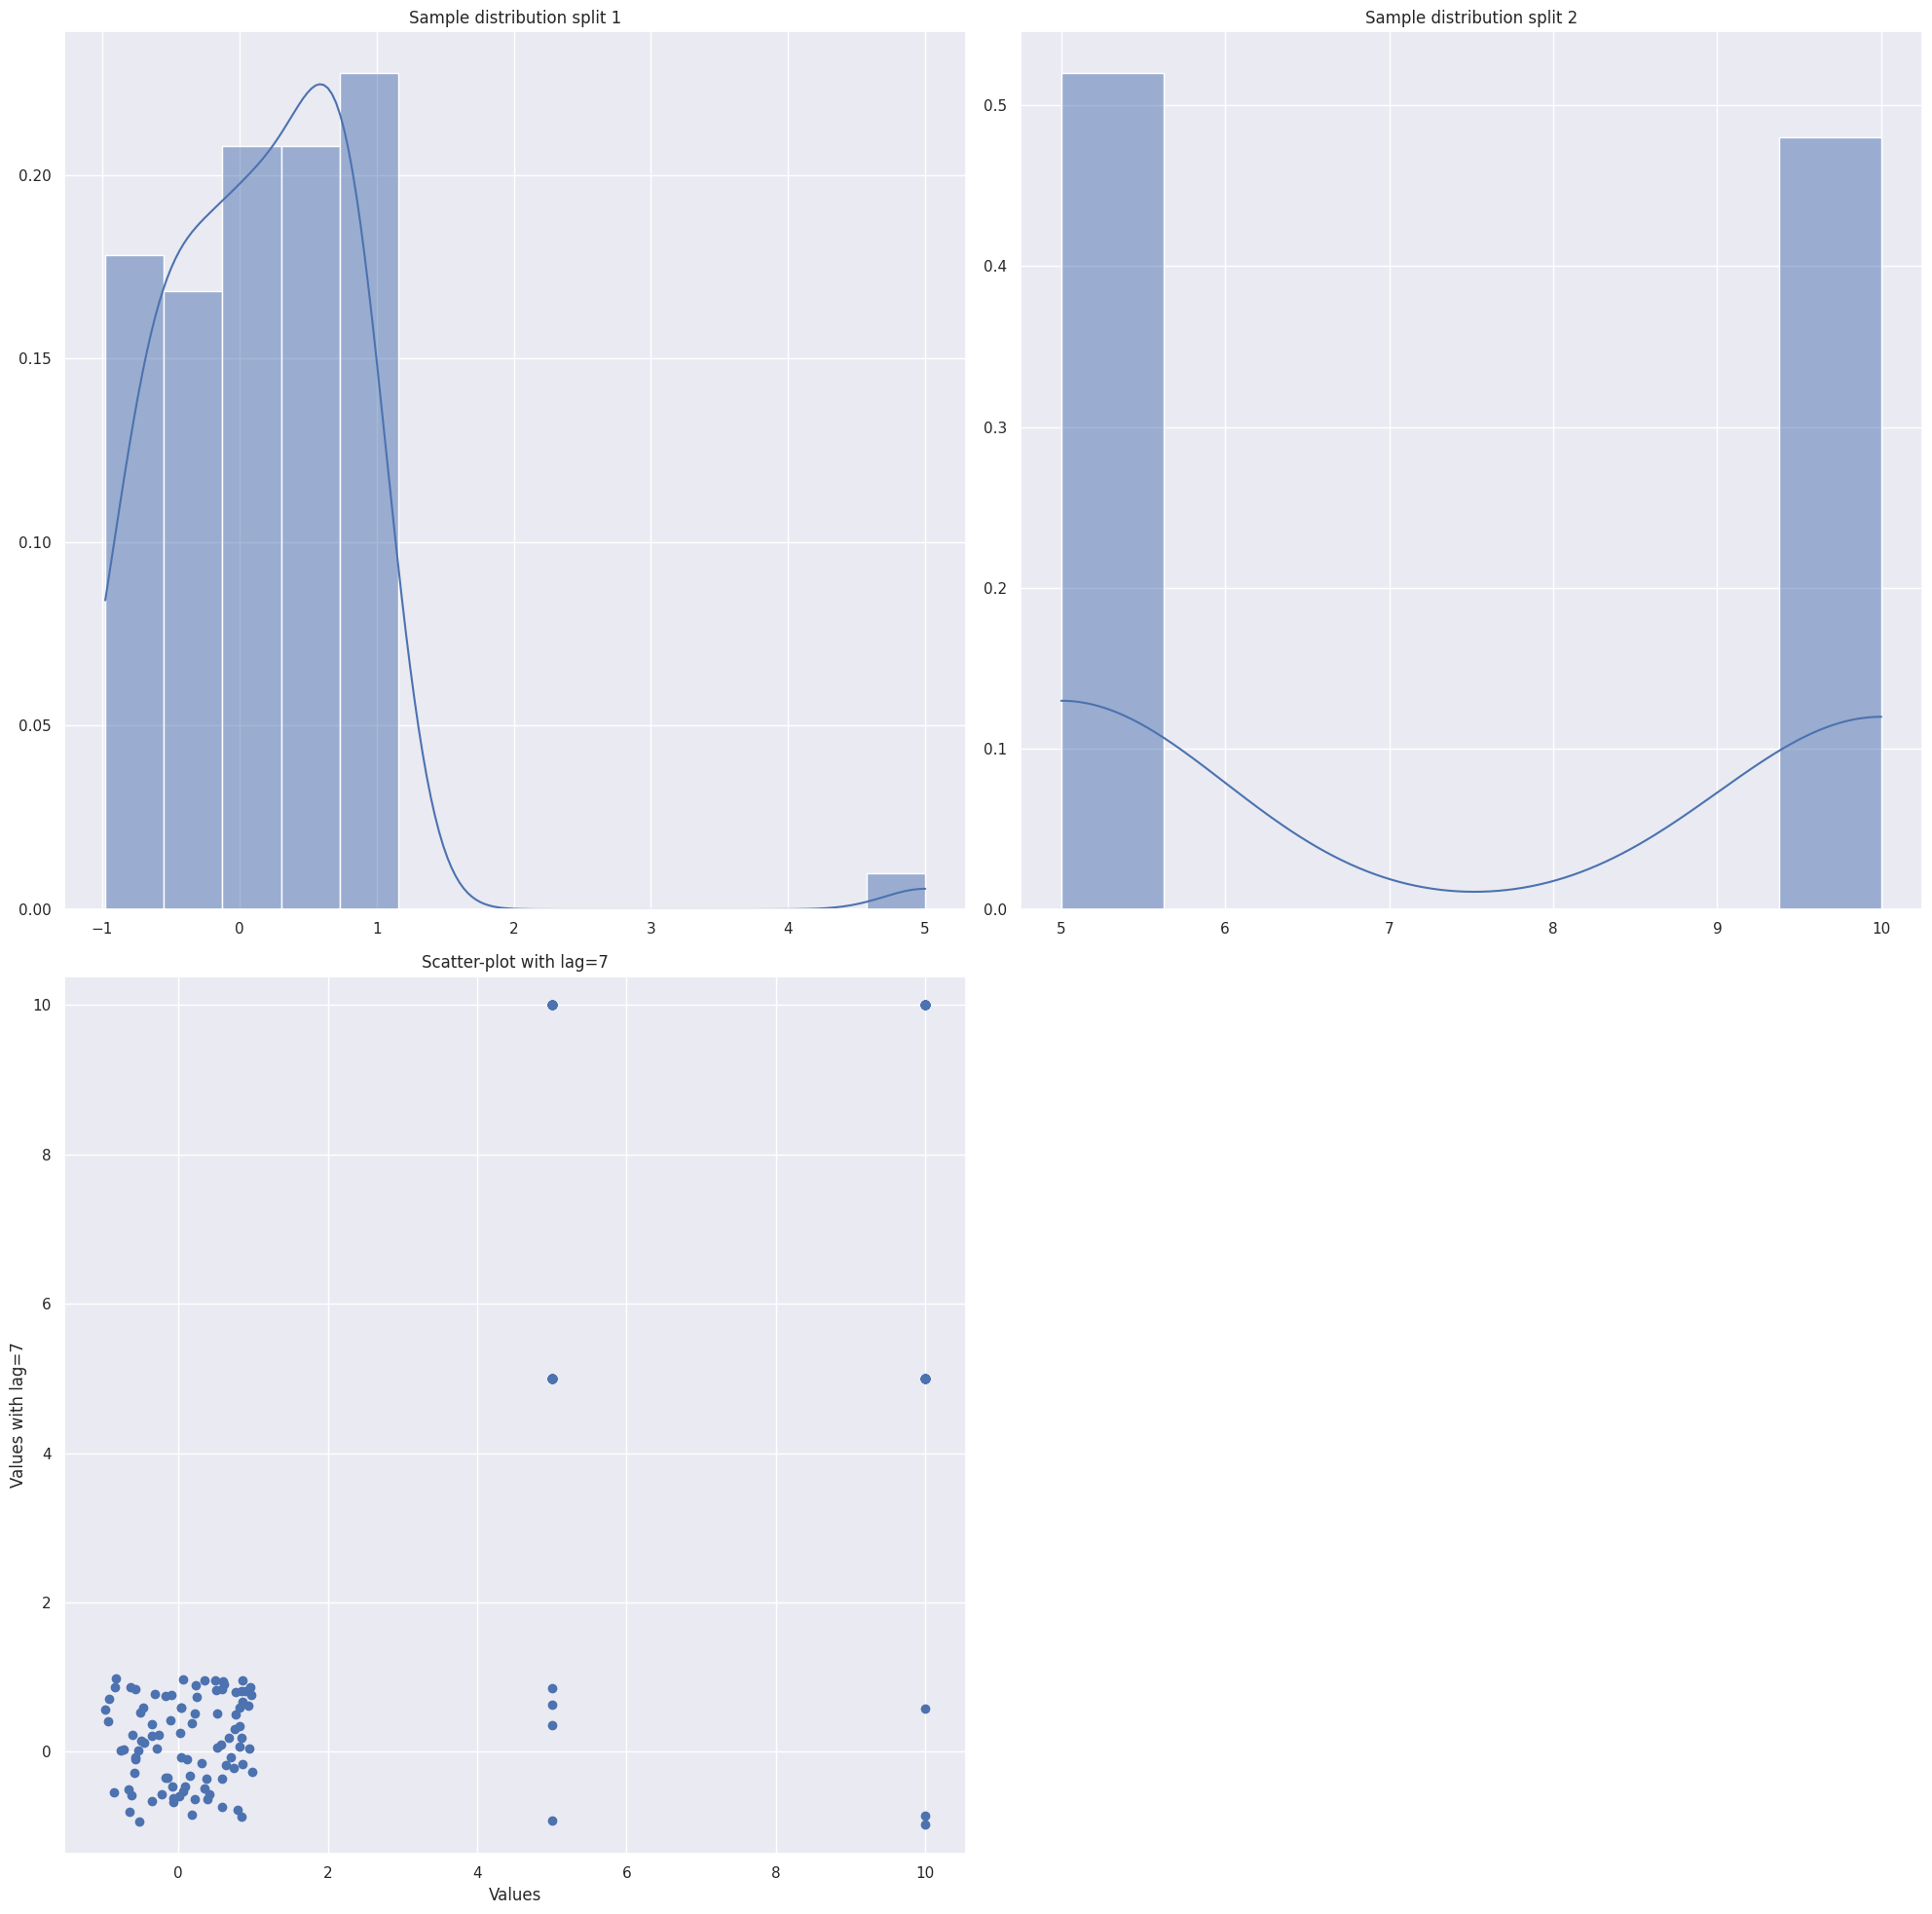

In [4]:
# Set inputs.
seq = np.concatenate(
    [np.random.uniform(-1, 1, 100), np.random.choice([5, 10], 100)]
)
index = pd.date_range(start="2023-01-01", periods=len(seq), freq="D")
srs = pd.Series(seq, index=index)
lag = 7
# TODO(Dan): Remove after integration with `cmamp`
figsize = (20, 20)
# Plot.
cpvistte.plot_histograms_and_lagged_scatterplot(srs, lag, figsize=figsize)

## `plot_projection()`

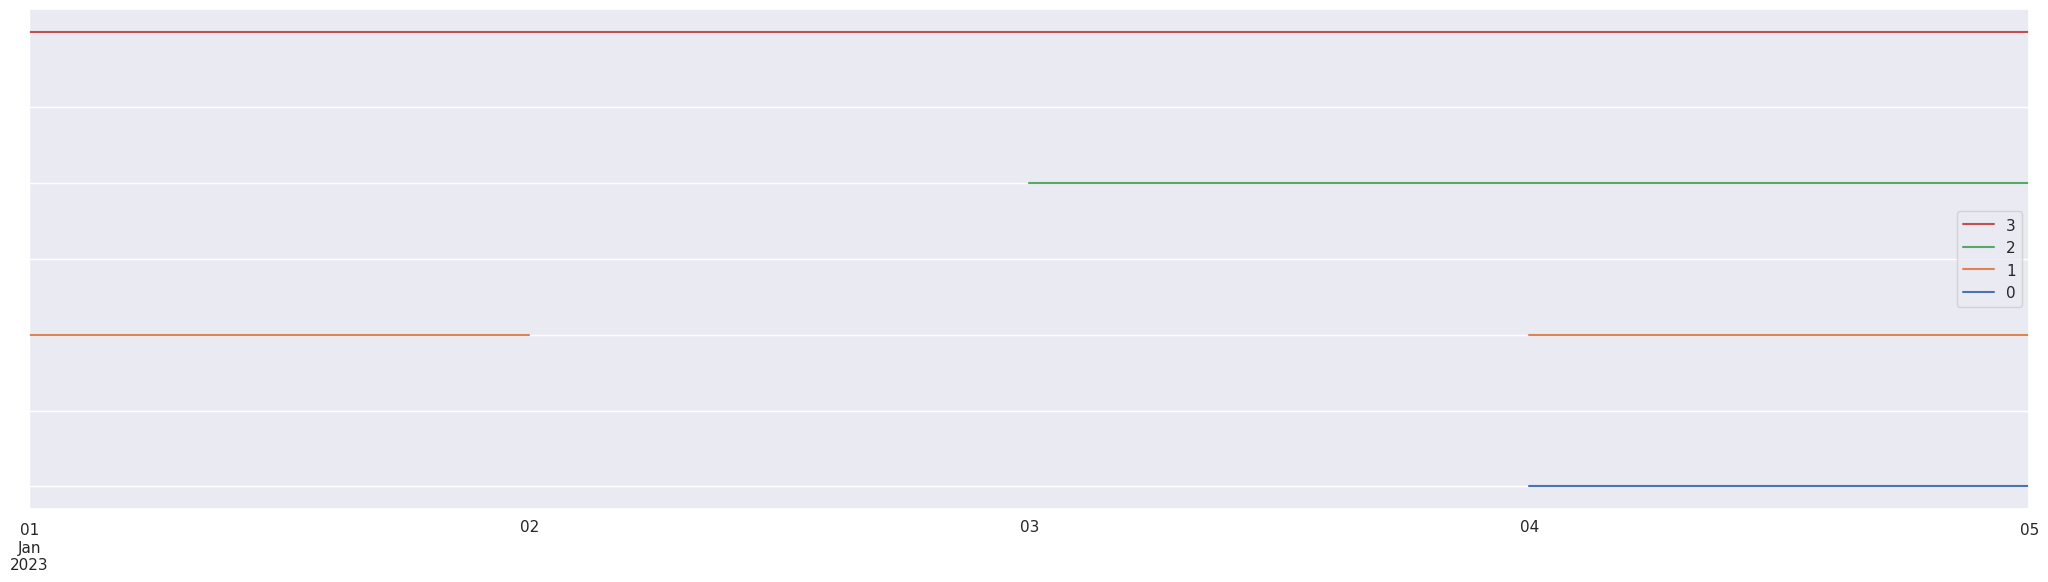

In [5]:
# Calling plot_projection to test that it's basic functionality works.
data = [
    [1, 1, 0, 1],
    [0, 1, 0, 1],
    [0, 0, 1, 1],
    [1, 1, 1, 1],
    [1, 1, 1, 1],
]
index = pd.date_range(start="2023-01-01", periods=len(data), freq="D")
df = pd.DataFrame(data, index=index)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
cplmiplo.plot_projection(df, special_values=[0], ax=ax)

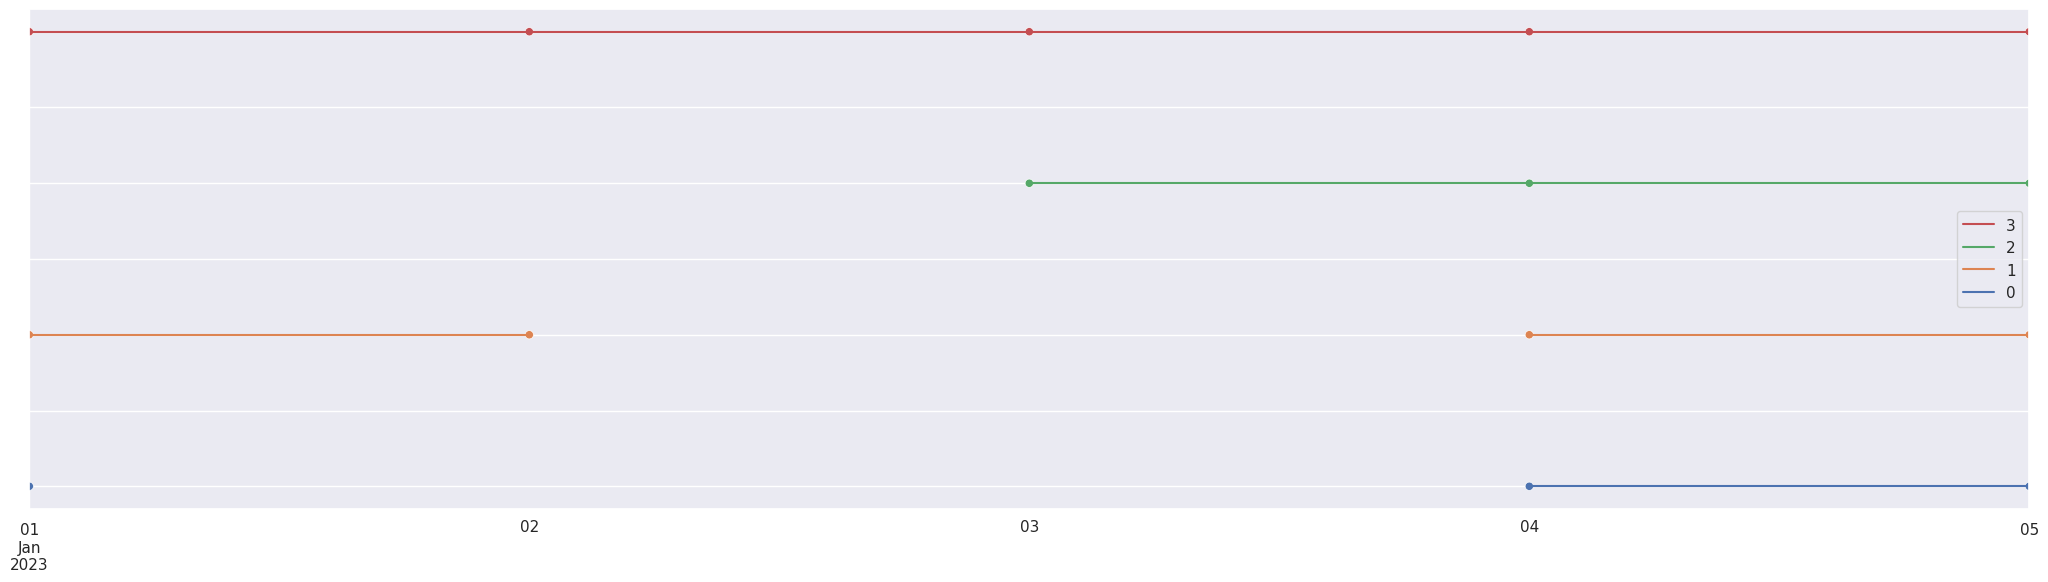

In [10]:
# Calling plot_projection with the scatter plot mode enabled.
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
cplmiplo.plot_projection(df, special_values=[0], mode="scatter", ax=ax)